<a href="https://colab.research.google.com/github/Niharika-Saha/Adaptive-Bacterial-Antibiotic-Resistance-Prediction-using-Meta-Learning/blob/prototypical-networks/protonet_token_cnn_baseline_draft2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset: (8733, 9)  | unique mechanisms: 233
Train/Val/Test mechanisms: 163/35/35
Train/Val/Test samples: 7557/774/402
Vocab size: 1026
MAX_LEN: 512
Tasks | train:1500 val:300 test:500  (N=3,K=3,Q=5)
{'cosine': True, 'rc_train': True, 'rc_prob': 0.25, 'max_len': 512, 'k': 5, 'dropout_support': 0.03, 'dropout_query': 0.01, 'lr': 0.0002, 'episodes': 1400}
Training...


  2%|▏         | 30/1400 [00:02<01:49, 12.54it/s]

[20/1400] loss=1.079  train=0.675±0.172  val=0.669±0.153  T=0.997


  4%|▎         | 51/1400 [00:04<01:55, 11.67it/s]

[40/1400] loss=1.058  train=0.680±0.157  val=0.671±0.154  T=0.993


  5%|▌         | 73/1400 [00:05<01:47, 12.31it/s]

[60/1400] loss=1.015  train=0.665±0.168  val=0.648±0.160  T=0.989


  6%|▌         | 87/1400 [00:07<02:01, 10.79it/s]

[80/1400] loss=0.995  train=0.652±0.183  val=0.626±0.155  T=0.985


  8%|▊         | 109/1400 [00:09<01:48, 11.92it/s]

[100/1400] loss=0.927  train=0.644±0.160  val=0.624±0.161  T=0.980


  9%|▉         | 131/1400 [00:11<01:42, 12.36it/s]

[120/1400] loss=0.929  train=0.651±0.163  val=0.621±0.158  T=0.976


 11%|█         | 153/1400 [00:13<01:40, 12.46it/s]

[140/1400] loss=0.917  train=0.653±0.154  val=0.622±0.158  T=0.973


 12%|█▏        | 167/1400 [00:14<01:57, 10.50it/s]

[160/1400] loss=0.884  train=0.631±0.158  val=0.610±0.146  T=0.969


 14%|█▍        | 193/1400 [00:16<01:40, 12.00it/s]

[180/1400] loss=0.891  train=0.643±0.161  val=0.615±0.149  T=0.966


 15%|█▍        | 208/1400 [00:18<01:47, 11.05it/s]

[200/1400] loss=0.873  train=0.633±0.164  val=0.607±0.156  T=0.962


 16%|█▋        | 230/1400 [00:20<01:37, 12.02it/s]

[220/1400] loss=0.884  train=0.644±0.161  val=0.608±0.159  T=0.959


 18%|█▊        | 252/1400 [00:22<01:32, 12.36it/s]

[240/1400] loss=0.877  train=0.660±0.149  val=0.613±0.152  T=0.957


 19%|█▉        | 268/1400 [00:23<01:38, 11.55it/s]

[260/1400] loss=0.941  train=0.644±0.154  val=0.607±0.163  T=0.955


 21%|██        | 288/1400 [00:25<01:39, 11.15it/s]

[280/1400] loss=0.961  train=0.645±0.154  val=0.602±0.157  T=0.954


 22%|██▏       | 308/1400 [00:27<01:39, 10.93it/s]

[300/1400] loss=0.874  train=0.629±0.162  val=0.591±0.152  T=0.952


 24%|██▎       | 330/1400 [00:29<01:29, 11.89it/s]

[320/1400] loss=0.847  train=0.652±0.157  val=0.605±0.160  T=0.950


 25%|██▌       | 351/1400 [00:31<01:28, 11.82it/s]

[340/1400] loss=0.930  train=0.620±0.167  val=0.605±0.153  T=0.948


 27%|██▋       | 373/1400 [00:33<01:23, 12.24it/s]

[360/1400] loss=0.919  train=0.640±0.153  val=0.597±0.165  T=0.947


 28%|██▊       | 388/1400 [00:35<01:30, 11.14it/s]

[380/1400] loss=0.919  train=0.647±0.159  val=0.598±0.157  T=0.946


 29%|██▉       | 410/1400 [00:36<01:22, 11.94it/s]

[400/1400] loss=0.882  train=0.645±0.162  val=0.601±0.158  T=0.945


 31%|███       | 432/1400 [00:38<01:21, 11.84it/s]

[420/1400] loss=0.835  train=0.641±0.170  val=0.604±0.153  T=0.943


 31%|███▏      | 439/1400 [00:40<01:28, 10.82it/s]

[440/1400] loss=0.824  train=0.644±0.170  val=0.602±0.156  T=0.942
Early stopping.
Best Val Acc: 0.6709


TEST  acc=0.617 ± 0.158 | loss=0.975 | episodes=500
Random baseline (1/N): 0.333


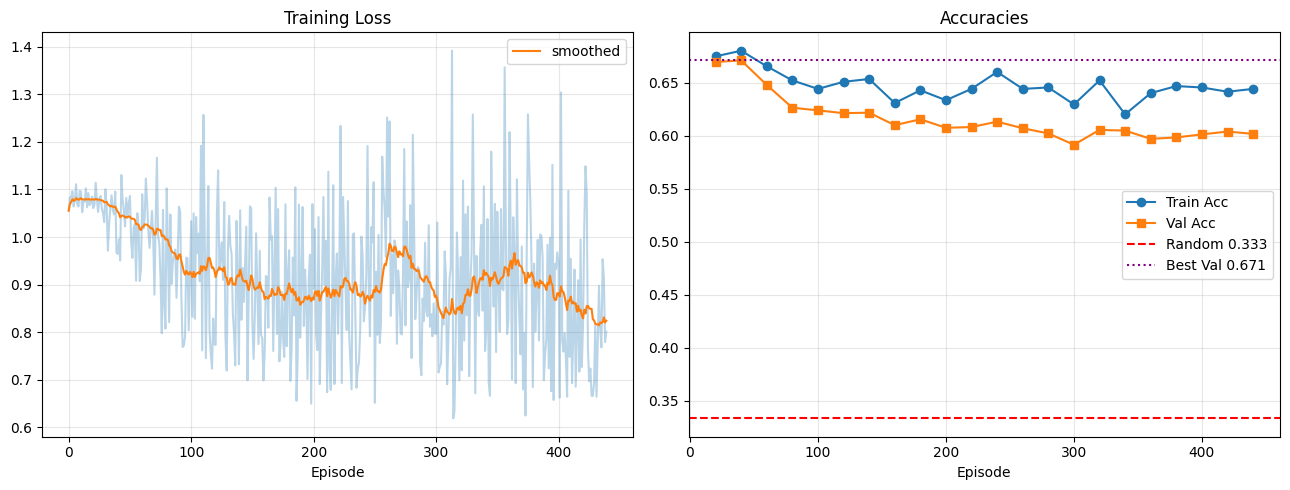

In [17]:
# ============================================================
# Few-shot AMR via Token-CNN ProtoNet
# (cosine+temp, RC augmentation, MAX_LEN=512, restrained dropout)
# ============================================================

# 0) Imports, seeds, device
import os, random, numpy as np, pandas as pd, torch, torch.nn as nn, torch.nn.functional as F
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED); random.seed(RANDOM_SEED); torch.manual_seed(RANDOM_SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed(RANDOM_SEED)
    torch.backends.cudnn.deterministic = True
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 1) Load & clean
CSV_PATH = "megares_fasta_processed.csv"  # change if needed
df = pd.read_csv(CSV_PATH)
df = df.dropna(subset=["sequence","mechanism"]).reset_index(drop=True)
df["sequence"] = df["sequence"].str.upper().str.replace(r"[^ACGT]", "", regex=True)
print("Dataset:", df.shape, " | unique mechanisms:", df["mechanism"].nunique())

# 2) Mechanism split (70/15/15 by classes)
mechs = np.array(sorted(df["mechanism"].unique()))
train_mechs, temp_mechs = train_test_split(mechs, test_size=0.30, random_state=RANDOM_SEED, shuffle=True)
val_mechs,   test_mechs = train_test_split(temp_mechs, test_size=0.50, random_state=RANDOM_SEED, shuffle=True)

train_df = df[df.mechanism.isin(train_mechs)].reset_index(drop=True)
val_df   = df[df.mechanism.isin(val_mechs)].reset_index(drop=True)
test_df  = df[df.mechanism.isin(test_mechanisms := test_mechs)].reset_index(drop=True)
print(f"Train/Val/Test mechanisms: {len(train_mechs)}/{len(val_mechs)}/{len(test_mechanisms)}")
print(f"Train/Val/Test samples: {len(train_df)}/{len(val_df)}/{len(test_df)}")

# 3) Tokenization (train-only vocab)
KMER_K = 5           # <-- try 4 in a separate sweep
PAD, UNK = "<PAD>", "<UNK>"

def kmers_from_seq(seq, k=KMER_K):
    L = len(seq)
    if L < k: return []
    return [seq[i:i+k] for i in range(L-k+1)]

from collections import Counter
counter = Counter()
for s in train_df["sequence"]:
    counter.update(kmers_from_seq(s, KMER_K))
tokens = [PAD, UNK] + sorted(counter.keys())
stoi = {t:i for i,t in enumerate(tokens)}
itos = {i:t for t,i in stoi.items()}
VOCAB_SIZE = len(stoi)
print("Vocab size:", VOCAB_SIZE)

def encode_ids(seq, k=KMER_K):
    arr = kmers_from_seq(seq, k)
    if not arr: return [stoi[UNK]]
    return [stoi.get(tok, stoi[UNK]) for tok in arr]

def encode_df_to_ids(dfp):
    ids = [encode_ids(s, KMER_K) for s in dfp["sequence"].tolist()]
    nums = dfp[["gc_content","seq_len"]].to_numpy(np.float32)
    y = dfp["mechanism"].to_numpy()
    return ids, nums, y

train_ids, train_num, ytr = encode_df_to_ids(train_df)
val_ids,   val_num,   yva = encode_df_to_ids(val_df)
test_ids,  test_num,  yte = encode_df_to_ids(test_df)

# ------------ MAX_LEN (fixed 512), pad, RC tokens, numeric standardization
def pick_max_len(list_of_ids, pct=0.90):  # retained for info
    lens = np.array([len(x) for x in list_of_ids])
    return int(np.clip(np.quantile(lens, pct), 16, 2048))

MAX_LEN = 512
print("MAX_LEN:", MAX_LEN)

def pad_sequences(list_of_ids, max_len=MAX_LEN, pad_id=None):
    if pad_id is None:
        pad_id = stoi[PAD]
    out = np.full((len(list_of_ids), max_len), pad_id, dtype=np.int64)
    for i, seq in enumerate(list_of_ids):
        s = seq[:max_len]
        out[i, :len(s)] = s
    return out

# base tokens
Xtr_tok = pad_sequences(train_ids, MAX_LEN)
Xva_tok = pad_sequences(val_ids,   MAX_LEN)
Xte_tok = pad_sequences(test_ids,  MAX_LEN)

# reverse complement for TRAIN augmentation
_comp = str.maketrans("ACGT", "TGCA")
def rev_comp(seq): return seq.translate(_comp)[::-1]
train_ids_rc = [encode_ids(rev_comp(s), KMER_K) for s in train_df["sequence"].tolist()]
Xtr_tok_rc   = pad_sequences(train_ids_rc, MAX_LEN)

# standardize numeric features (train stats)
num_mean = train_num.mean(axis=0, keepdims=True)
num_std  = train_num.std(axis=0, keepdims=True) + 1e-6
train_num = (train_num - num_mean)/num_std
val_num   = (val_num   - num_mean)/num_std
test_num  = (test_num  - num_mean)/num_std

# 4) Episodic sampler with RC augmentation
from collections import defaultdict

def mech_index(y):
    d = defaultdict(list)
    for i, lab in enumerate(y):
        d[lab].append(i)
    return {k: np.asarray(v, dtype=int) for k,v in d.items()}

def _choose_tokens_with_rc(Xtok, Xtok_rc, ids, rng, rc_prob=0.25):
    """Flip to reverse-complement tokens with probability rc_prob (per example)."""
    if Xtok_rc is None or rc_prob <= 0:
        return Xtok[ids]
    mask = rng.random(len(ids)) < rc_prob
    out = Xtok[ids].copy()
    if mask.any():
        out[mask] = Xtok_rc[ids[mask]]
    return out

def create_tasks(X_tok, X_num, y, idx_map, num_tasks=1000, N=3, K=3, Q=5,
                 seed=42, X_tok_rc=None, rc_prob=0.25, augment_rc=False):
    rng = np.random.default_rng(seed)
    tasks = []
    valid = [m for m, ids in idx_map.items() if len(ids) >= K + Q]
    if len(valid) < N: return tasks
    for _ in range(num_tasks):
        me_sel = rng.choice(valid, size=N, replace=False)
        s_tok, s_num, s_y = [], [], []
        q_tok, q_num, q_y = [], [], []
        for j, m in enumerate(me_sel):
            ids = rng.choice(idx_map[m], size=K + Q, replace=False)
            s, q = ids[:K], ids[K:K+Q]
            if augment_rc and (X_tok_rc is not None):
                s_tok.append(_choose_tokens_with_rc(X_tok, X_tok_rc, s, rng, rc_prob))
                q_tok.append(_choose_tokens_with_rc(X_tok, X_tok_rc, q, rng, rc_prob))
            else:
                s_tok.append(X_tok[s]); q_tok.append(X_tok[q])
            s_num.append(X_num[s]); q_num.append(X_num[q])
            s_y.append(np.full(K, j, np.int64)); q_y.append(np.full(Q, j, np.int64))
        tasks.append({
            "s_tok": np.vstack(s_tok), "s_num": np.vstack(s_num), "s_y": np.concatenate(s_y),
            "q_tok": np.vstack(q_tok), "q_num": np.vstack(q_num), "q_y": np.concatenate(q_y),
            "mechs": list(me_sel)
        })
    return tasks

idx_tr, idx_va, idx_te = mech_index(ytr), mech_index(yva), mech_index(yte)

# episodic configs
N, K, Q = 3, 3, 5
RC_PROB = 0.25              # EDIT
SUPPORT_DROP = 0.03         # EDIT
QUERY_DROP   = 0.01         # EDIT

train_tasks = create_tasks(
    Xtr_tok, train_num, ytr, idx_tr, num_tasks=1500, N=N, K=K, Q=Q,
    seed=RANDOM_SEED, X_tok_rc=Xtr_tok_rc, rc_prob=RC_PROB, augment_rc=True
)
val_tasks   = create_tasks(Xva_tok, val_num, yva, idx_va, num_tasks=300,  N=N, K=K, Q=Q,
                           seed=RANDOM_SEED, augment_rc=False)
test_tasks  = create_tasks(Xte_tok, test_num, yte, idx_te, num_tasks=500,  N=N, K=K, Q=Q,
                           seed=RANDOM_SEED, augment_rc=False)

print(f"Tasks | train:{len(train_tasks)} val:{len(val_tasks)} test:{len(test_tasks)}  (N={N},K={K},Q={Q})")

# TokenDropout
def token_dropout(arr, p=0.0, pad_id=0):
    if p <= 0: return arr
    mask = (np.random.rand(*arr.shape) < p)
    out = arr.copy()
    out[mask] = pad_id
    return out

# 5) Token-CNN encoder (dual pooling + conservative dropout)
class CNNSeqEncoder(nn.Module):
    def __init__(self, vocab_size, pad_idx, max_len,
                 embed_dim=256, token_dim=128,
                 conv_channels=96, kernel_sizes=(3,5,7),
                 use_cosine=True, num_features=2):
        super().__init__()
        self.use_cosine = use_cosine
        self.pad_idx = pad_idx

        self.emb = nn.Embedding(vocab_size, token_dim, padding_idx=pad_idx)
        self.emb_dropout = nn.Dropout(0.20)

        self.convs = nn.ModuleList([
            nn.Sequential(
                nn.Conv1d(token_dim, conv_channels, kernel_size=k, padding=k//2),
                nn.ReLU(),
                nn.Dropout1d(0.10)
            ) for k in kernel_sizes
        ])

        self.num_proj = nn.Sequential(
            nn.Linear(num_features, 32),
            nn.ReLU(),
            nn.BatchNorm1d(32),
        )

        fused_in = conv_channels * len(kernel_sizes) * 2 + 32  # max+avg pool
        self.proj = nn.Sequential(
            nn.Linear(fused_in, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.50),
            nn.Linear(512, embed_dim)
        )
        self.log_temp = nn.Parameter(torch.zeros(1))  # temperature for cosine logits

    def forward(self, tokens, nums):
        x = self.emb(tokens)             # [B,L,E]
        x = self.emb_dropout(x)
        x = x.transpose(1, 2)            # [B,E,L]

        pooled = []
        for block in self.convs:
            h = block(x)                                # [B,C,L]
            p_max  = F.adaptive_max_pool1d(h, 1).squeeze(-1)
            p_mean = F.adaptive_avg_pool1d(h, 1).squeeze(-1)
            pooled.extend([p_max, p_mean])

        h_text = torch.cat(pooled, dim=1)
        h_num  = self.num_proj(nums)
        h = torch.cat([h_text, h_num], dim=1)
        z = self.proj(h)
        if self.use_cosine:
            z = F.normalize(z, p=2, dim=1)
        return z

def compute_prototypes(z, y_idx):
    classes = torch.unique(y_idx)
    protos = torch.stack([z[y_idx==c].mean(0) for c in classes], dim=0)
    return protos, classes

def proto_loss(model, protos, qz, qy, eps=0.05):
    if model.use_cosine:
        temp = torch.exp(model.log_temp)
        logits = (qz @ protos.T) / temp
    else:
        logits = -torch.cdist(qz, protos)
    log_p = F.log_softmax(logits, dim=1)
    ncls = log_p.size(1)
    with torch.no_grad():
        hard = torch.zeros_like(log_p).scatter_(1, qy[:, None], 1.0)
        soft = (1.0 - eps) * hard + eps / ncls
    return -(soft * log_p).sum(dim=1).mean()

@torch.no_grad()
def evaluate(model, tasks, device):
    model.eval()
    accs, losses = [], []
    for t in tasks:
        s_tok = torch.from_numpy(t["s_tok"]).long().to(device)
        s_num = torch.from_numpy(t["s_num"]).float().to(device)
        q_tok = torch.from_numpy(t["q_tok"]).long().to(device)
        q_num = torch.from_numpy(t["q_num"]).float().to(device)
        s_y   = torch.from_numpy(t["s_y"]).long().to(device)
        q_y   = torch.from_numpy(t["q_y"]).long().to(device)

        s_z = model(s_tok, s_num)
        q_z = model(q_tok, q_num)
        protos, _ = compute_prototypes(s_z, s_y)

        if model.use_cosine:
            preds = (q_z @ protos.T).argmax(1)
        else:
            preds = (-torch.cdist(q_z, protos)).argmax(1)

        loss = proto_loss(model, protos, q_z, q_y).item()
        accs.append((preds==q_y).float().mean().item())
        losses.append(loss)
    return float(np.mean(accs)), float(np.std(accs)), float(np.mean(losses))

# 6) Train (restrained stochasticity + softer logits)
EMBED_DIM = 256
model = CNNSeqEncoder(
    vocab_size=VOCAB_SIZE, pad_idx=stoi[PAD], max_len=MAX_LEN,
    embed_dim=EMBED_DIM, token_dim=128, conv_channels=96,
    kernel_sizes=(3,5,7), use_cosine=True, num_features=2
).to(device)

LR = 2e-4
opt   = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay=2e-4)
sched = torch.optim.lr_scheduler.CosineAnnealingLR(opt, T_max=800)

EPISODES = 1400
EVAL_EVERY = 20
PATIENCE = 20

print({
    "cosine": model.use_cosine,
    "rc_train": True, "rc_prob": RC_PROB,
    "max_len": MAX_LEN, "k": KMER_K,
    "dropout_support": SUPPORT_DROP, "dropout_query": QUERY_DROP,
    "lr": LR, "episodes": EPISODES
})

best_val, bad = 0.0, 0
train_losses, train_accs, val_accs = [], [], []

PAD_ID = stoi[PAD]

print("Training...")
for ep in tqdm(range(1, EPISODES+1)):
    model.train()
    t = random.choice(train_tasks)

    # restrained token dropout (no numeric jitter)
    t_s_tok = token_dropout(t["s_tok"], p=SUPPORT_DROP, pad_id=PAD_ID)
    t_q_tok = token_dropout(t["q_tok"], p=QUERY_DROP,   pad_id=PAD_ID)

    s_tok = torch.from_numpy(t_s_tok).long().to(device)
    s_num = torch.from_numpy(t["s_num"]).float().to(device)
    q_tok = torch.from_numpy(t_q_tok).long().to(device)
    q_num = torch.from_numpy(t["q_num"]).float().to(device)
    s_y   = torch.from_numpy(t["s_y"]).long().to(device)
    q_y   = torch.from_numpy(t["q_y"]).long().to(device)

    opt.zero_grad()
    s_z = model(s_tok, s_num)
    q_z = model(q_tok, q_num)
    protos, _ = compute_prototypes(s_z, s_y)
    loss = proto_loss(model, protos, q_z, q_y)
    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), 5.0)
    opt.step(); sched.step()

    # keep temperature soft enough
    with torch.no_grad():
        model.log_temp.data.clamp_(-3.0, 0.5)

    train_losses.append(loss.item())

    # (Optional) very light episode refresh — DISABLED by default
    # if ep % 200 == 0:
    #     refresh_n = max(1, int(0.10 * len(train_tasks)))
    #     rng = np.random.default_rng(RANDOM_SEED + ep)
    #     replace_idx = rng.choice(np.arange(len(train_tasks)), size=refresh_n, replace=False)
    #     new_tasks = create_tasks(Xtr_tok, train_num, ytr, idx_tr, num_tasks=refresh_n,
    #                              N=N, K=K, Q=Q, seed=RANDOM_SEED+ep,
    #                              X_tok_rc=Xtr_tok_rc, rc_prob=RC_PROB, augment_rc=True)
    #     for i, ni in enumerate(replace_idx):
    #         train_tasks[ni] = new_tasks[i]

    if ep % EVAL_EVERY == 0:
        tr_acc, tr_std, _ = evaluate(model, train_tasks[:50], device)
        va_acc, va_std, _ = evaluate(model, val_tasks, device)
        train_accs.append(tr_acc); val_accs.append(va_acc)
        T = float(torch.exp(model.log_temp).detach().cpu())
        print(f"[{ep}/{EPISODES}] loss={np.mean(train_losses[-EVAL_EVERY:]):.3f}  "
              f"train={tr_acc:.3f}±{tr_std:.3f}  val={va_acc:.3f}±{va_std:.3f}  T={T:.3f}")
        if va_acc > best_val:
            best_val, bad = va_acc, 0
            torch.save(model.state_dict(), "best_protonet_cnn.pt")
        else:
            bad += 1
        if bad >= PATIENCE:
            print("Early stopping."); break

print("Best Val Acc:", round(best_val, 4))

# 7) Final test
model.load_state_dict(torch.load("best_protonet_cnn.pt", map_location=device))
test_acc, test_std, test_loss = evaluate(model, test_tasks, device)
print(f"TEST  acc={test_acc:.3f} ± {test_std:.3f} | loss={test_loss:.3f} | episodes={len(test_tasks)}")
print(f"Random baseline (1/N): {1.0/float(N):.3f}")

# 8) Plots
fig, axes = plt.subplots(1,2, figsize=(13,5))
axes[0].plot(train_losses, alpha=0.3)
axes[0].plot(pd.Series(train_losses).rolling(window=20, min_periods=1).mean(), label="smoothed")
axes[0].set_title("Training Loss"); axes[0].set_xlabel("Episode"); axes[0].legend(); axes[0].grid(True, alpha=0.3)

eval_steps = [i*EVAL_EVERY for i in range(1, len(val_accs)+1)]
axes[1].plot(eval_steps, train_accs, marker='o', label="Train Acc")
axes[1].plot(eval_steps, val_accs, marker='s', label="Val Acc")
axes[1].axhline(1.0/N, color='r', linestyle='--', label=f"Random {1.0/N:.3f}")
axes[1].axhline(best_val, color='purple', linestyle=':', label=f"Best Val {best_val:.3f}")
axes[1].set_title("Accuracies"); axes[1].set_xlabel("Episode"); axes[1].legend(); axes[1].grid(True, alpha=0.3)
plt.tight_layout(); plt.show()


[t-SNE] Using 270 samples from test across 10 classes.


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(



=== t-SNE Diagnostic Summary ===
Number of points visualized:     270
Number of unique mechanisms:   10
Embeddings dimensionality before t-SNE: 256
Embeddings dimensionality after  t-SNE: 2
Silhouette score:                -0.165
Mean intra-class distance:       13.134
Mean inter-class distance:       17.911
Inter / Intra ratio:             1.364
ARI (KMeans vs true):            0.200
NMI (KMeans vs true):            0.397



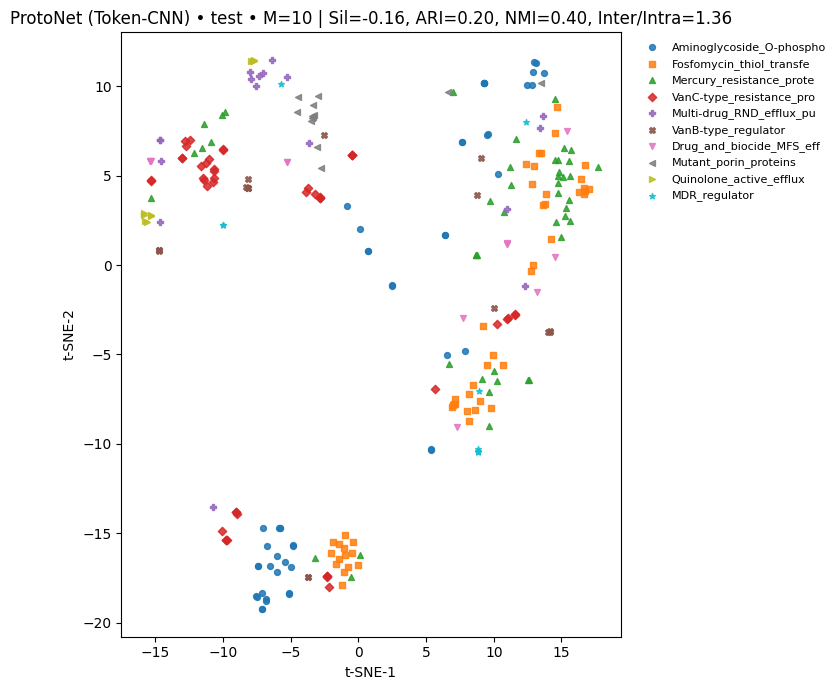

In [18]:
# ============================
# t-SNE for Token-CNN (with summary stats)
# ============================
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans

model.eval()
LABEL_COL      = "mechanism"
SUBSET_SOURCE  = "test"     # {"train","val","test","all"}
TOP_M_CLASSES  = 10
N_PER_CLASS    = 50
TSNE_PERPLEX   = 30
RANDOM_STATE   = 42

# choose subset
base_df = {"train":train_df, "val":val_df, "test":test_df}.get(SUBSET_SOURCE, df)
counts = base_df[LABEL_COL].value_counts()
kept_labels = counts.head(TOP_M_CLASSES).index.tolist()

subset_list = []
for lab in kept_labels:
    sub = base_df[base_df[LABEL_COL] == lab]
    if len(sub) > N_PER_CLASS:
        sub = sub.sample(N_PER_CLASS, random_state=RANDOM_STATE)
    subset_list.append(sub)
subset = pd.concat(subset_list).reset_index(drop=True)
print(f"[t-SNE] Using {len(subset)} samples from {SUBSET_SOURCE} across {len(kept_labels)} classes.")

# encode with the same pipeline (no leakage)
ids = [encode_ids(s, KMER_K) for s in subset["sequence"].tolist()]
tok = np.full((len(ids), MAX_LEN), stoi[PAD], dtype=np.int64)
for i, seq in enumerate(ids):
    s = seq[:MAX_LEN]; tok[i, :len(s)] = s
num = subset[["gc_content","seq_len"]].to_numpy(np.float32)
num = (num - num_mean)/num_std  # standardize using train stats

y_str = subset[LABEL_COL].values

with torch.no_grad():
    Xt = torch.from_numpy(tok).long().to(device)
    Xn = torch.from_numpy(num).float().to(device)
    Z  = model(Xt, Xn).detach().cpu().numpy()

num_points = len(Z); num_classes = len(np.unique(y_str)); emb_before = Z.shape[1]
perplexity = min(TSNE_PERPLEX, max(5, len(Z)//4 - 1))
tsne = TSNE(n_components=2, perplexity=perplexity, metric="euclidean",
            init="pca", learning_rate="auto", n_iter=1000,
            random_state=RANDOM_STATE, verbose=0)
Z2 = tsne.fit_transform(Z); emb_after = Z2.shape[1]

label_to_int = {lab:i for i, lab in enumerate(kept_labels)}
y_int = np.array([label_to_int.get(v, -1) for v in y_str])

sil = silhouette_score(Z2, y_int, metric="euclidean") if num_classes > 1 else float("nan")
kmeans = KMeans(n_clusters=num_classes, n_init="auto", random_state=RANDOM_STATE)
pred = kmeans.fit_predict(Z2)
ari = adjusted_rand_score(y_int, pred)
nmi = normalized_mutual_info_score(y_int, pred)

D = pairwise_distances(Z2, metric="euclidean")
intra = [D[i, y_int==y_int[i]].mean() for i in range(num_points)]
inter = [D[i, y_int!=y_int[i]].mean() for i in range(num_points)]
mean_intra = float(np.nanmean(intra))
mean_inter = float(np.nanmean(inter))
ratio = (mean_inter/mean_intra) if mean_intra>0 else float("nan")

print("\n=== t-SNE Diagnostic Summary ===")
print(f"Number of points visualized:     {num_points}")
print(f"Number of unique {LABEL_COL}s:   {num_classes}")
print(f"Embeddings dimensionality before t-SNE: {emb_before}")
print(f"Embeddings dimensionality after  t-SNE: {emb_after}")
print(f"Silhouette score:                {sil:.3f}")
print(f"Mean intra-class distance:       {mean_intra:.3f}")
print(f"Mean inter-class distance:       {mean_inter:.3f}")
print(f"Inter / Intra ratio:             {ratio:.3f}")
print(f"ARI (KMeans vs true):            {ari:.3f}")
print(f"NMI (KMeans vs true):            {nmi:.3f}")
print("================================\n")

# plot
plt.figure(figsize=(8,7))
markers = ["o","s","^","D","P","X","v","<",">","*"]
for i, lab in enumerate(kept_labels):
    idx = (y_str == lab)
    plt.scatter(Z2[idx,0], Z2[idx,1], s=18, marker=markers[i%len(markers)], alpha=0.85, label=lab[:24])
plt.xlabel("t-SNE-1"); plt.ylabel("t-SNE-2")
plt.title(f"ProtoNet (Token-CNN) • {SUBSET_SOURCE} • M={num_classes} | "
          f"Sil={sil:.2f}, ARI={ari:.2f}, NMI={nmi:.2f}, Inter/Intra={ratio:.2f}")
plt.legend(bbox_to_anchor=(1.02,1), loc="upper left", fontsize=8, ncol=1, frameon=False)
plt.tight_layout(); plt.show()
